<a href="https://colab.research.google.com/github/rubensolano2/Timeseries/blob/main/SERIES_TEMPORALES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTAR LIBRERIAS

In [ ]:
pip install chart-studio
!pip install plotly --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

#1. Introduction to data and time 

## 1.2 Importing time series and data

parse dates: parse_dates es un parámetro que se utiliza en varias funciones de pandas en Python, como read_csv, read_excel y to_datetime. Su objetivo es indicar a pandas que ciertas columnas de un DataFrame contienen fechas y deben ser convertidas a objetos de fecha y hora de Python.

index_col, le cambia el nombre a la columna ID

In [ ]:
google = pd.read_csv("/content/drive/MyDrive/1. proyectos/PROGRAMACIÓN 2022/proyectos/time series/GOOG.csv", index_col='Date', parse_dates=['Date'])

In [ ]:
google.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-15,16.087200,16.165657,15.825183,15.881721,15.881721,223562839
2008-01-16,15.665532,15.940003,14.992056,15.341247,15.341247,423983259
2008-01-17,15.461048,15.585083,14.894422,14.963663,14.963663,329903943
2008-01-18,15.152206,15.192804,14.905381,14.950213,14.950213,342864341
2008-01-22,13.998281,14.881720,13.977608,14.554197,14.554197,381484558


##1.2 Limpieza de Datos

Podemos tener dataset con columnas vacias por lo que vamos a hacerle una limpieza

usamos el siguiente método:
- .fillna(method='ffill')
es un método de pandas que se utiliza para rellenar valores faltantes (NaN) en un DataFrame o Serie de pandas con los valores que se encuentran en la fila anterior, de forma que los valores faltantes se llenan hacia adelante (forward fill) o "relleno hacia adelante".

El parámetro method se establece en 'ffill' para especificar que se debe usar la técnica de "relleno hacia adelante". Esto significa que pandas rellenará los valores faltantes con los valores de la fila anterior en la misma columna, de manera que los valores faltantes sean reemplazados por los valores más recientes que se tienen en la columna.

In [ ]:
google.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-15,16.087200,16.165657,15.825183,15.881721,15.881721,223562839
2008-01-16,15.665532,15.940003,14.992056,15.341247,15.341247,423983259
2008-01-17,15.461048,15.585083,14.894422,14.963663,14.963663,329903943
2008-01-18,15.152206,15.192804,14.905381,14.950213,14.950213,342864341
2008-01-22,13.998281,14.881720,13.977608,14.554197,14.554197,381484558


##1.3Visualización de los datos 

visualización mensual

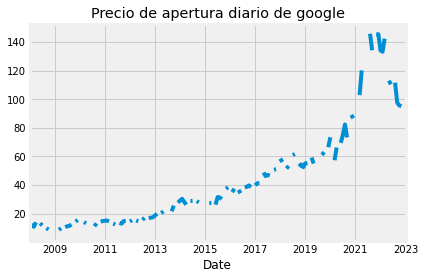

In [ ]:
google["Open"].asfreq('M').plot() # asfreq method is used to convert a time series to a specified frequency. Here it is monthly frequency.
plt.title('Precio de apertura diario de google')
plt.show()

visualización diaria

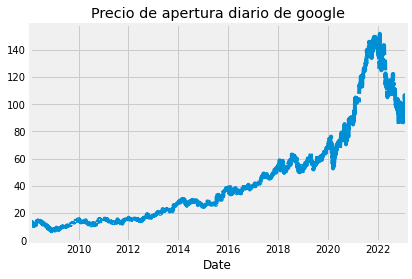

In [ ]:
google['Open'].resample('D').mean().plot()
plt.title('Precio de apertura diario de google')
plt.show()


faltan datos por lo que vamos a predecirlos linealmente

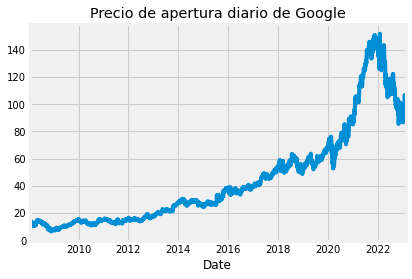

In [ ]:
google['Open'].resample('D').mean().interpolate(method='linear').plot()
plt.title('Precio de apertura diario de Google')
plt.show()


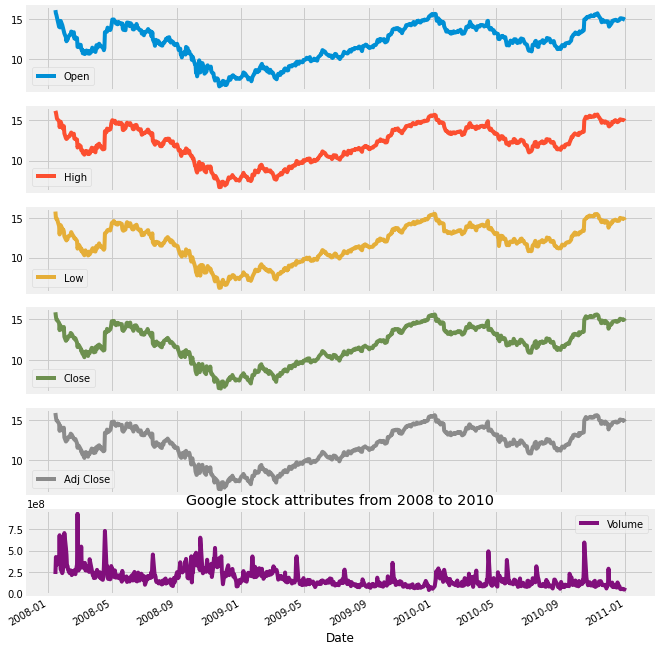

In [ ]:
google['2008':'2010'].plot(subplots=True, figsize=(10,12))
plt.title('Google stock attributes from 2008 to 2010')
plt.savefig('stocks.png')
plt.show()

##1.4 Timestamps and period 

"Timestamps" se usan para representar un punto en el tiempo. "Periods" representan un intervalo de tiempo. Los "Periods" pueden ser utilizados para verificar si un evento específico se encuentra dentro del período dado. También se pueden convertir entre las formas de "Timestamps" y "Periods".

In [ ]:
# Creating a Timestamp
timestamp = pd.Timestamp(2017, 1, 1, 12)
timestamp

Timestamp('2017-01-01 12:00:00')

In [ ]:
# Creating a period
period = pd.Period('2017-01-01')
period

Period('2017-01-01', 'D')

In [ ]:
# Checking if the given timestamp exists in the given period
period.start_time < timestamp < period.end_time

True

In [ ]:
# Converting timestamp to period
new_period = timestamp.to_period(freq='H')
new_period

Period('2017-01-01 12:00', 'H')

In [ ]:
# Converting period to timestamp
new_timestamp = period.to_timestamp(freq='H', how='start')
new_timestamp

Timestamp('2017-01-01 00:00:00')

## 1.5 Usando rango de datos

"date_range" es un método que devuelve un índice de fecha y hora con una frecuencia fija. Es bastante útil al crear su propia serie de tiempo para datos preexistentes o al organizar todos los datos en torno al atributo de serie de tiempo creado por usted.

In [ ]:
# Creating a datetimeindex with daily frequency
dr1 = pd.date_range(start='1/1/18', end='1/9/18')
dr1

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
# Creating a datetimeindex with monthly frequency
dr2 = pd.date_range(start='1/1/18', end='1/1/19', freq='M')
dr2

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31'],
              dtype='datetime64[ns]', freq='M')

In [ ]:
# Creating a datetimeindex without specifying start date and using periods
dr3 = pd.date_range(end='1/4/2014', periods=8)
dr3

DatetimeIndex(['2013-12-28', '2013-12-29', '2013-12-30', '2013-12-31',
               '2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04'],
              dtype='datetime64[ns]', freq='D')

el periodo intermedio es la mitad entre ellos

In [ ]:
# Creating a datetimeindex specifying start date , end date and periods
dr4 = pd.date_range(start='2013-04-24', end='2014-11-27', periods=3)
dr4

DatetimeIndex(['2013-04-24', '2014-02-09', '2014-11-27'], dtype='datetime64[ns]', freq=None)

##1.6 uso de los datos  temporales

In [ ]:
df = pd.DataFrame({'year': [2015, 2016], 'month': [2, 3], 'day': [4, 5]})
df

,year,month,day
0,2015,2,4
1,2016,3,5


In [ ]:
df = pd.to_datetime(df)
df

0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]

In [ ]:
df = pd.to_datetime('01-01-2017')
df

Timestamp('2017-01-01 00:00:00')

##1.7 Shiffting and lags

Podemos desplazar el índice por el número deseado de períodos con una frecuencia de tiempo opcional. Esto es útil al comparar una serie de tiempo con su pasado.

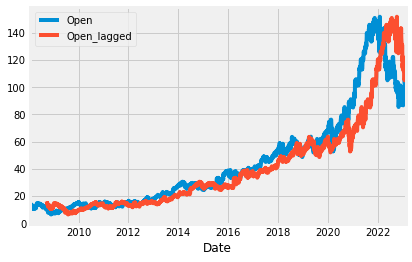

In [ ]:
google["Open"].resample('D').mean().interpolate(method='linear').plot(legend=True)
shifted = google["Open"].resample('D').mean().interpolate(method='linear').shift(250).plot(legend=True)
shifted.legend(['Open','Open_lagged'])
plt.show()

## 1.8 Resampling

- Upsampling: La serie de tiempo se re-muestrea de una frecuencia baja a una frecuencia alta (de mensual a diario). Implica el relleno o interpolación de datos faltantes.

- Downsampling: La serie de tiempo se re-muestrea de una frecuencia alta a una frecuencia baja (de semanal a mensual). Implica la agregación de datos existentes.

In [ ]:
# Let's use pressure data to demonstrate this
pressure = pd.read_csv('/content/drive/MyDrive/1. proyectos/PROGRAMACIÓN 2022/proyectos/time series/pressure.csv', index_col='datetime', parse_dates=['datetime'])
pressure.tail()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2017-11-29 20:00:00,NaN,1031.0,NaN,1030.0,1016.0,1017.0,1021.0,1018.0,1025.0,1016.0,...,1021.0,NaN,1021.0,1017.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 21:00:00,NaN,1030.0,NaN,1030.0,1016.0,1017.0,1020.0,1018.0,1024.0,1018.0,...,1021.0,NaN,1023.0,1019.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 22:00:00,NaN,1030.0,NaN,1029.0,1015.0,1016.0,1020.0,1017.0,1024.0,1018.0,...,1022.0,NaN,1024.0,1019.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 23:00:00,NaN,1029.0,NaN,1028.0,1016.0,1016.0,1020.0,1016.0,1024.0,1020.0,...,1023.0,NaN,1026.0,1022.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-30 00:00:00,NaN,1029.0,NaN,1028.0,1015.0,1017.0,1019.0,1016.0,1024.0,1021.0,...,1024.0,NaN,1027.0,1023.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pressure = pressure.iloc[1:]
pressure = pressure.fillna(method='ffill')
pressure.tail()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2017-11-29 20:00:00,1021.0,1031.0,1013.0,1030.0,1016.0,1017.0,1021.0,1018.0,1025.0,1016.0,...,1021.0,1020.0,1021.0,1017.0,984.0,1011.0,968.0,1023.0,1023.0,1011.0
2017-11-29 21:00:00,1021.0,1030.0,1013.0,1030.0,1016.0,1017.0,1020.0,1018.0,1024.0,1018.0,...,1021.0,1020.0,1023.0,1019.0,984.0,1011.0,968.0,1023.0,1023.0,1011.0
2017-11-29 22:00:00,1021.0,1030.0,1013.0,1029.0,1015.0,1016.0,1020.0,1017.0,1024.0,1018.0,...,1022.0,1020.0,1024.0,1019.0,984.0,1011.0,968.0,1023.0,1023.0,1011.0
2017-11-29 23:00:00,1021.0,1029.0,1013.0,1028.0,1016.0,1016.0,1020.0,1016.0,1024.0,1020.0,...,1023.0,1020.0,1026.0,1022.0,984.0,1011.0,968.0,1023.0,1023.0,1011.0
2017-11-30 00:00:00,1021.0,1029.0,1013.0,1028.0,1015.0,1017.0,1019.0,1016.0,1024.0,1021.0,...,1024.0,1020.0,1027.0,1023.0,984.0,1011.0,968.0,1023.0,1023.0,1011.0


El método 'bfill' se refiere a rellenar los valores faltantes hacia atrás o backward fill. Es decir, cada valor NaN se reemplaza con el siguiente valor no nulo en la serie. Por lo tanto, cualquier valor faltante que aparezca en una fecha dada se rellenará con el valor de la fecha siguiente en la serie de tiempo. Esto es útil cuando se desea utilizar los valores más recientes disponibles para rellenar los valores faltantes, en lugar de simplemente rellenarlos con un valor constante.

In [ ]:
pressure = pressure.fillna(method='bfill')
pressure.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 13:00:00,807.0,1024.0,1009.0,1027.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,1001.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 14:00:00,807.0,1024.0,1009.0,1027.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,986.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 15:00:00,807.0,1024.0,1009.0,1028.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,945.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 16:00:00,807.0,1024.0,1009.0,1028.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,904.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 17:00:00,807.0,1024.0,1009.0,1029.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,863.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0


In [ ]:
# Shape before resampling(downsampling)
pressure.shape

(45252, 36)

En detalle, la función resample de pandas se utiliza para re-muestrear una serie de tiempo a una frecuencia más alta o más baja que la original. En este caso, resample('3D') indica que se re-muestree la serie a una frecuencia de 3 días. La función mean() se utiliza para calcular la media de los valores en cada intervalo de 3 días.

In [ ]:
# We downsample from hourly to 3 day frequency aggregated using mean
pressure = pressure.resample('3D').mean()
pressure.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01,931.627119,1022.644068,1010.881356,1031.271186,1011.627119,1011.966102,1016.322034,1012.084746,1022.542373,1024.118644,...,1014.152542,1013.423729,937.627119,1013.677966,985.050847,1012.949153,1011.796610,1013.000000,1013.000000,990.525424
2012-10-04,1019.083333,1023.041667,1014.694444,1028.305556,1015.555556,1016.277778,1013.194444,1014.097222,1019.972222,1020.666667,...,1018.097222,1017.680556,1017.180556,1019.805556,984.930556,1013.083333,1012.611111,1013.000000,1013.000000,990.083333
2012-10-07,1013.930556,1017.444444,1016.597222,1018.736111,1013.416667,1014.222222,1012.888889,1011.861111,1005.833333,1020.458333,...,1017.958333,1016.750000,1014.152778,1016.305556,982.972222,1013.027778,1007.555556,1013.000000,1013.000000,989.833333
2012-10-10,1015.000000,1015.430556,1014.833333,1018.416667,1010.694444,1014.013889,1000.166667,1005.611111,986.000000,984.486111,...,1018.694444,1017.916667,1016.166667,1017.319444,979.763889,1006.527778,998.763889,1012.333333,1012.333333,987.888889
2012-10-13,1008.152778,1018.111111,1021.069444,1015.930556,1017.277778,1018.375000,1015.666667,1015.500000,1013.625000,1010.444444,...,1025.055556,1024.388889,1020.805556,1023.736111,984.527778,1013.027778,1007.194444,1013.000000,1013.000000,990.430556


In [ ]:
# Shape after resampling(downsampling)
pressure.shape

(629, 36)

In [ ]:
pressure = pressure.resample('D').pad()
pressure.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01,931.627119,1022.644068,1010.881356,1031.271186,1011.627119,1011.966102,1016.322034,1012.084746,1022.542373,1024.118644,...,1014.152542,1013.423729,937.627119,1013.677966,985.050847,1012.949153,1011.796610,1013.0,1013.0,990.525424
2012-10-02,931.627119,1022.644068,1010.881356,1031.271186,1011.627119,1011.966102,1016.322034,1012.084746,1022.542373,1024.118644,...,1014.152542,1013.423729,937.627119,1013.677966,985.050847,1012.949153,1011.796610,1013.0,1013.0,990.525424
2012-10-03,931.627119,1022.644068,1010.881356,1031.271186,1011.627119,1011.966102,1016.322034,1012.084746,1022.542373,1024.118644,...,1014.152542,1013.423729,937.627119,1013.677966,985.050847,1012.949153,1011.796610,1013.0,1013.0,990.525424
2012-10-04,1019.083333,1023.041667,1014.694444,1028.305556,1015.555556,1016.277778,1013.194444,1014.097222,1019.972222,1020.666667,...,1018.097222,1017.680556,1017.180556,1019.805556,984.930556,1013.083333,1012.611111,1013.0,1013.0,990.083333
2012-10-05,1019.083333,1023.041667,1014.694444,1028.305556,1015.555556,1016.277778,1013.194444,1014.097222,1019.972222,1020.666667,...,1018.097222,1017.680556,1017.180556,1019.805556,984.930556,1013.083333,1012.611111,1013.0,1013.0,990.083333


In [ ]:
# Shape after resampling(upsampling)
pressure.shape

(1885, 36)

Otra vez un aumento en el número de filas. El remuestreo es útil cuando se utiliza correctamente.

#2. FINANCE AND STATISTICS

##2.1 Percent change

Este código calcula la variación diaria en los precios máximos de las acciones de Google y traza la serie de tiempo resultante.

Primero, se crea una nueva columna 'Change' en el DataFrame google y se calcula su valor dividiendo el precio máximo del día (High) por el precio máximo del día anterior (High.shift()). Esto da como resultado el cambio porcentual diario en el precio máximo de las acciones de Google.

Luego, se llama al método .plot() en la columna 'Change' para trazar la serie de tiempo resultante. El parámetro figsize se utiliza para ajustar el tamaño de la figura del gráfico.

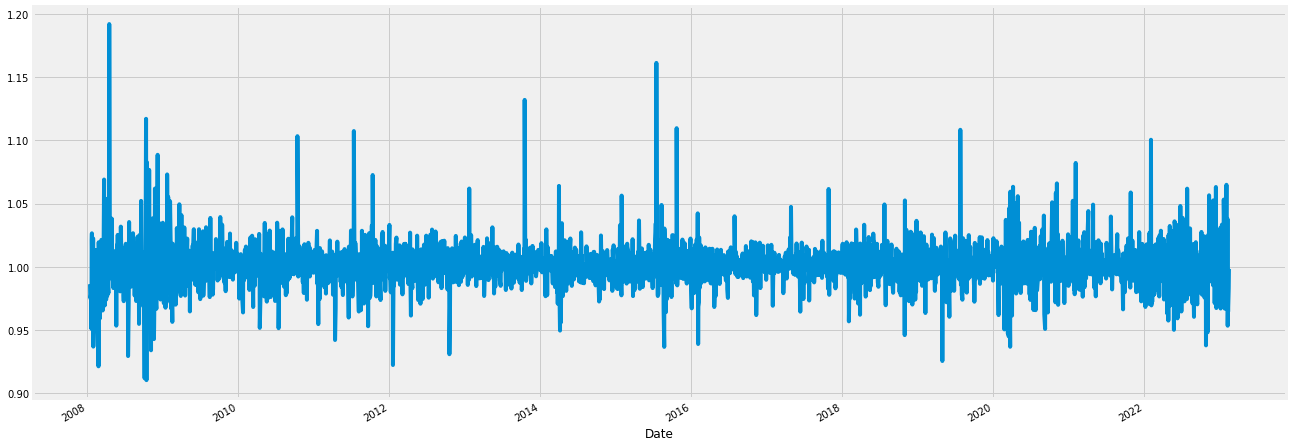

In [ ]:
google['Change'] = google.High.div(google.High.shift())
google['Change'].plot(figsize=(20,8))

##2.2 STOCK RETURNS

Este código calcula el rendimiento diario de las acciones de Google en porcentaje y traza la serie de tiempo resultante.

Primero, se crea una nueva columna 'Return' en el DataFrame google y se calcula su valor restando 1 del cambio porcentual diario (Change) y luego multiplicando por 100. Esto convierte el cambio porcentual en una medida de rendimiento en porcentaje.

Luego, se llama al método .plot() en la columna 'Return' para trazar la serie de tiempo resultante. El parámetro figsize se utiliza para ajustar el tamaño de la figura del gráfico.

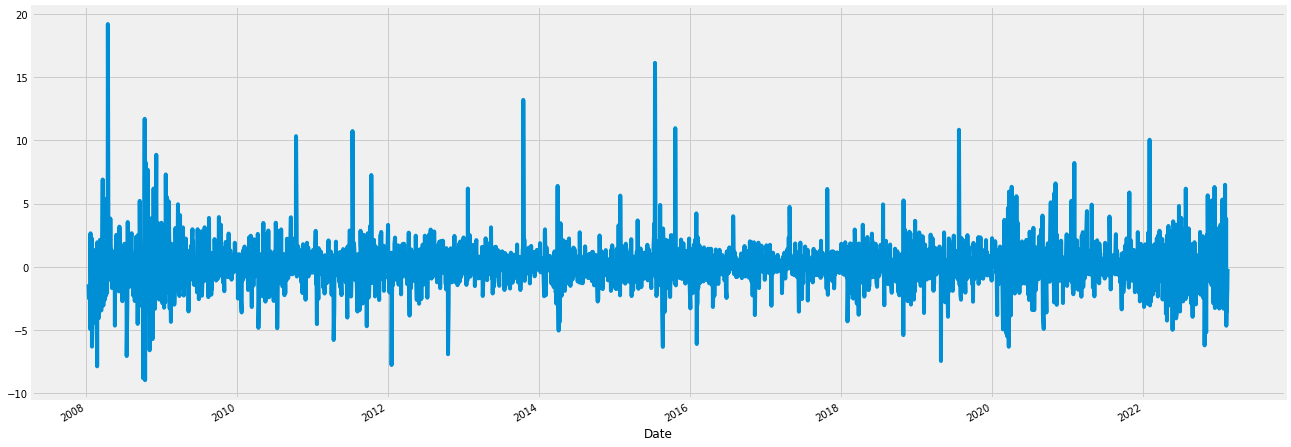

In [ ]:
google['Return'] = google.Change.sub(1).mul(100)
google['Return'].plot(figsize=(20,8))

Este código también calcula el rendimiento diario de las acciones de Google en porcentaje, utilizando una forma alternativa de cálculo.

En detalle, el método pct_change() se utiliza para calcular el cambio porcentual diario de los precios máximos de las acciones de Google. Luego, se multiplica por 100 con el método mul(100) para convertirlo a una medida de rendimiento en porcentaje.

Finalmente, se llama al método .plot() en la serie de tiempo resultante para trazar la serie de tiempo del rendimiento. El parámetro figsize se utiliza para ajustar el tamaño de la figura del gráfico.

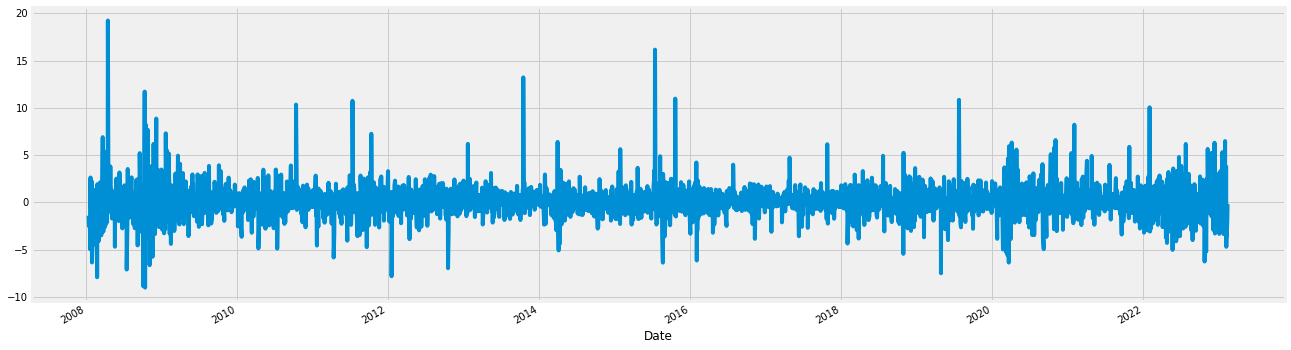

In [ ]:
google.High.pct_change().mul(100).plot(figsize=(20,6)) # Another way to calculate returns

## 2.3 CAMBIOS ABSOLUTOS EN LAS FILAS SUCESIVAS

Este código calcula y traza la diferencia diaria en los precios máximos de las acciones de Google.

En detalle, el método diff() se utiliza para calcular la diferencia diaria entre los precios máximos (High) de las acciones de Google. La función plot() se llama en la serie de tiempo resultante para trazar la serie de tiempo de las diferencias diarias. El parámetro figsize se utiliza para ajustar el tamaño de la figura del gráfico.

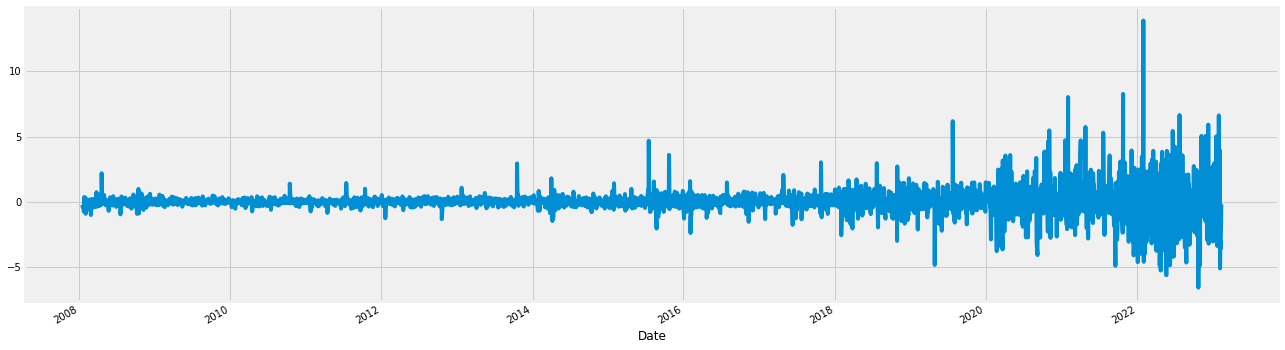

In [ ]:
google.High.diff().plot(figsize=(20,6))

## 2.4 comparación de dos o mas series temporales

Vamos a comparar 2 series de tiempo normalizándolas. Esto se logra dividiendo cada elemento de la serie de tiempo de todas las series de tiempo por el primer elemento. De esta manera, ambas series comienzan en el mismo punto y se pueden comparar fácilmente

In [ ]:
# We choose microsoft stocks to compare them with google
microsoft = pd.read_csv('/content/drive/MyDrive/1. proyectos/PROGRAMACIÓN 2022/proyectos/time series/data/MSFT_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
google = pd.read_csv('/content/drive/MyDrive/1. proyectos/PROGRAMACIÓN 2022/proyectos/time series/data/GOOGL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])

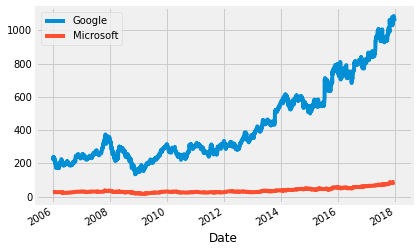

In [ ]:
# Plotting before normalization
google.High.plot()
microsoft.High.plot()
plt.legend(['Google','Microsoft'])
plt.show()

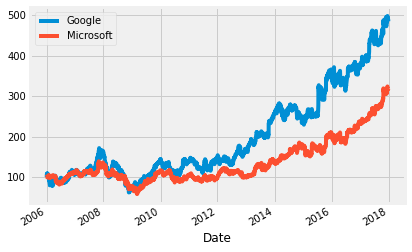

In [ ]:
# Normalizing and comparison
# Both stocks start from 100
normalized_google = google.High.div(google.High.iloc[0]).mul(100)
normalized_microsoft = microsoft.High.div(microsoft.High.iloc[0]).mul(100)
normalized_google.plot()
normalized_microsoft.plot()
plt.legend(['Google','Microsoft'])
plt.show()

se puede ver claramente el rendimiento de google en el tiempo

##2.5 window functions

Las funciones de ventana se utilizan para identificar sub-períodos y calcular submétricas de esos sub-períodos.

Rolling - Del mismo tamaño y deslizante.

Expanding - Contiene todos los valores anteriores.

Este código utiliza una función de ventana deslizante (rolling()) para calcular la media móvil de 90 días de la serie de tiempo de los precios máximos (High) de las acciones de Google.

En detalle, el método rolling() se utiliza para crear una ventana deslizante de tamaño 90 días en la serie de tiempo de precios máximos de Google (google.High), y luego se calcula la media de los valores en cada ventana utilizando el método mean().

Luego, se llaman a los métodos .plot() y plt.legend() para trazar la serie de tiempo original de los precios máximos (google.High) y la media móvil de 90 días (rolling_google), y se establece un título para la leyenda de la gráfica. Finalmente, se llama a plt.show() para mostrar la gráfica resultante en una ventana separada.

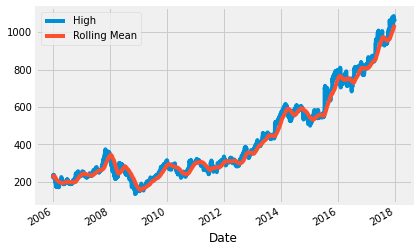

In [ ]:
# Rolling window functions
rolling_google = google.High.rolling('90D').mean()
google.High.plot()
rolling_google.plot()
plt.legend(['High','Rolling Mean'])
# Plotting a rolling mean of 90 day window with original High attribute of google stocks
plt.show()

Ahora, se puede observar que la gráfica de la media móvil (rolling mean) es una versión más suavizada de la gráfica original.

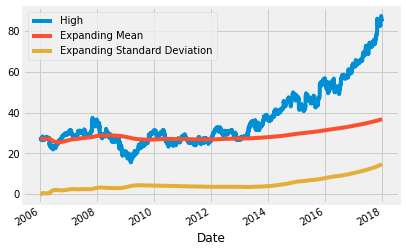

In [ ]:
# Expanding window functions
microsoft_mean = microsoft.High.expanding().mean()
microsoft_std = microsoft.High.expanding().std()
microsoft.High.plot()
microsoft_mean.plot()
microsoft_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.show()

## 2.6 OHLC GRAFICOS

Un gráfico OHLC es cualquier tipo de gráfico de precios que muestra los precios de apertura, máximo, mínimo y cierre de un período de tiempo determinado. Los gráficos OHLC se utilizan como herramienta de negociación para visualizar y analizar los cambios de precio a lo largo del tiempo de valores, divisas, acciones, bonos, materias primas, etc. Los gráficos OHLC son útiles para interpretar el sentimiento del mercado día a día y predecir cualquier cambio de precio futuro a través de los patrones que se producen.

El eje y en un gráfico OHLC se utiliza para la escala de precios, mientras que el eje x es la escala de tiempo. En cada período de tiempo individual, un gráfico OHLC representa un símbolo que representa dos rangos: los precios más altos y más bajos negociados, y también el precio de apertura y cierre en ese único período de tiempo (por ejemplo, en un día). En el símbolo de rango, los rangos de precios altos y bajos se representan por la longitud de la línea vertical principal. Los precios de apertura y cierre se representan mediante la posición vertical de las marcas de verificación que aparecen en el lado izquierdo (que representa el precio de apertura) y en el lado derecho (que representa el precio de cierre) de la línea vertical alto-bajo.

Se puede asignar un color a cada símbolo del gráfico OHLC para distinguir si el mercado es "alcista" (el precio de cierre es más alto que el de apertura) o "bajista" (el precio de cierre es más bajo que el de apertura).

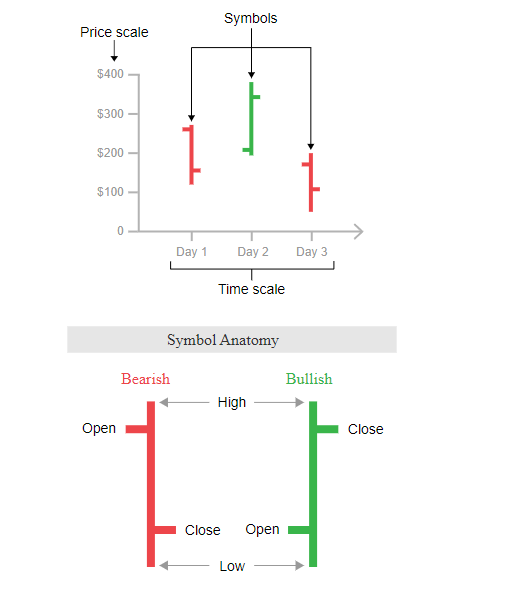

In [ ]:
# OHLC chart of June 2008
trace = go.Ohlc(x=google['06-2008'].index,
                open=google['06-2008'].Open,
                high=google['06-2008'].High,
                low=google['06-2008'].Low,
                close=google['06-2008'].Close)
data = [trace]
iplot(data, filename='simple_ohlc')

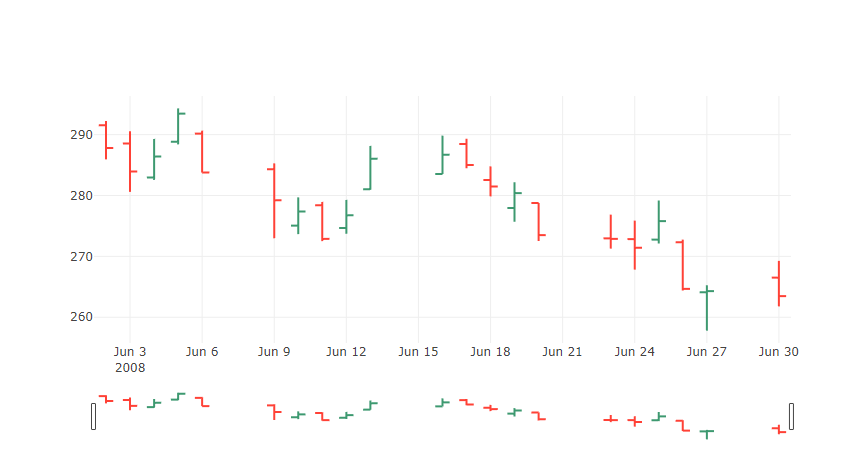

In [ ]:
# OHLC chart of 2008
trace = go.Ohlc(x=google['2008'].index,
                open=google['2008'].Open,
                high=google['2008'].High,
                low=google['2008'].Low,
                close=google['2008'].Close)
data = [trace]
iplot(data, filename='simple_ohlc')

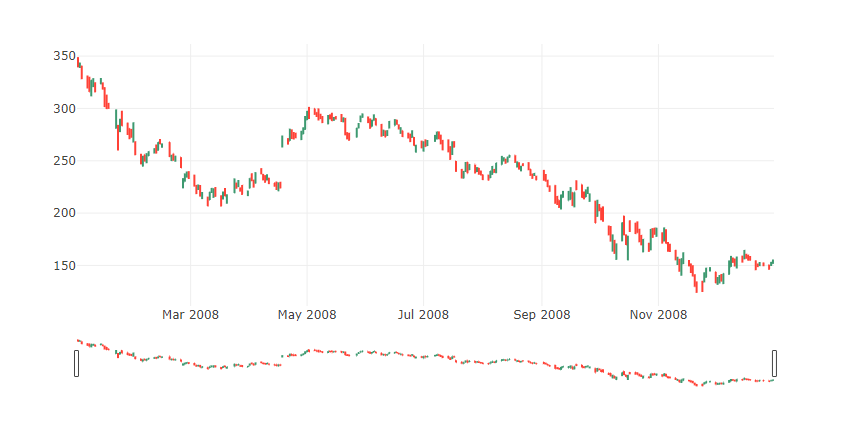

In [ ]:
# OHLC chart of 2008
trace = go.Ohlc(x=google.index,
                open=google.Open,
                high=google.High,
                low=google.Low,
                close=google.Close)
data = [trace]
iplot(data, filename='simple_ohlc')

##2.7 grafico de velas

Este tipo de gráfico se utiliza como herramienta de negociación para visualizar y analizar los movimientos de precios a lo largo del tiempo de valores, derivados, divisas, acciones, bonos, materias primas, etc. Aunque los símbolos utilizados en los gráficos de velas (Candlestick Charts) se asemejan a un Box Plot, funcionan de manera diferente y, por lo tanto, no deben confundirse entre sí.

Los gráficos de velas muestran múltiples bits de información de precios, como el precio de apertura, precio de cierre, el precio más alto y el precio más bajo a través del uso de símbolos similares a velas. Cada símbolo representa la actividad de negociación comprimida para un único período de tiempo (un minuto, hora, día, mes, etc.). Cada símbolo de vela se traza a lo largo de una escala de tiempo en el eje x, para mostrar la actividad de negociación a lo largo del tiempo.

El rectángulo principal en el símbolo se conoce como el cuerpo real, que se utiliza para mostrar el rango entre el precio de apertura y cierre de ese período de tiempo. Mientras que las líneas que se extienden desde la parte inferior y superior del cuerpo real se conocen como sombras inferiores y superiores (o mecha). Cada sombra representa el precio más alto o más bajo negociado durante el período de tiempo representado. Cuando el mercado es alcista (el precio de cierre es más alto que el precio de apertura), el cuerpo suele ser de color blanco o verde. Pero cuando el mercado es bajista (el precio de cierre es más bajo que el precio de apertura), el cuerpo suele ser de color negro o rojo.

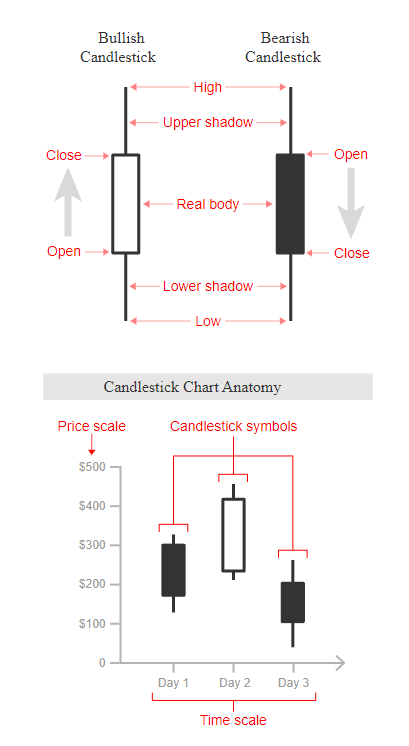

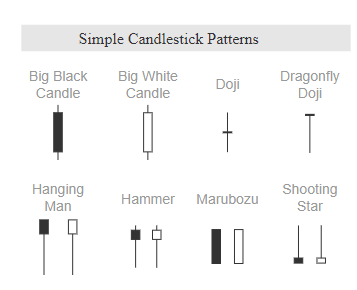

Los gráficos de velas son excelentes para detectar y predecir tendencias del mercado a lo largo del tiempo y son útiles para interpretar el sentimiento del mercado día a día, a través del color y la forma de cada símbolo de vela. Por ejemplo, cuanto más largo sea el cuerpo, más intensa será la presión de compra o venta. Mientras que un cuerpo muy corto indicaría que hay muy poco movimiento de precios en ese período de tiempo y representa consolidación.

Los gráficos de velas ayudan a revelar la psicología del mercado (el miedo y la codicia experimentados por vendedores y compradores) a través de varios indicadores, como la forma y el color, pero también mediante los muchos patrones identificables que se pueden encontrar en los gráficos de velas. En total, hay 42 patrones reconocidos que se dividen en patrones simples y complejos. Estos patrones encontrados en los gráficos de velas son útiles para mostrar las relaciones de precios y se pueden utilizar para predecir el posible movimiento futuro del mercado. Puede encontrar una lista y descripción de cada patrón aquí.

Sin embargo, debes tener en cuenta que los gráficos de velas no expresan los eventos que tienen lugar entre el precio de apertura y cierre, solo la relación entre los dos precios. Por lo tanto, no se puede saber cuán volátil fue la negociación dentro de ese único período de tiempo.

In [ ]:
# Candlestick chart of march 2008
trace = go.Candlestick(x=google['03-2008'].index,
                open=google['03-2008'].Open,
                high=google['03-2008'].High,
                low=google['03-2008'].Low,
                close=google['03-2008'].Close)
data = [trace]
iplot(data, filename='simple_candlestick')

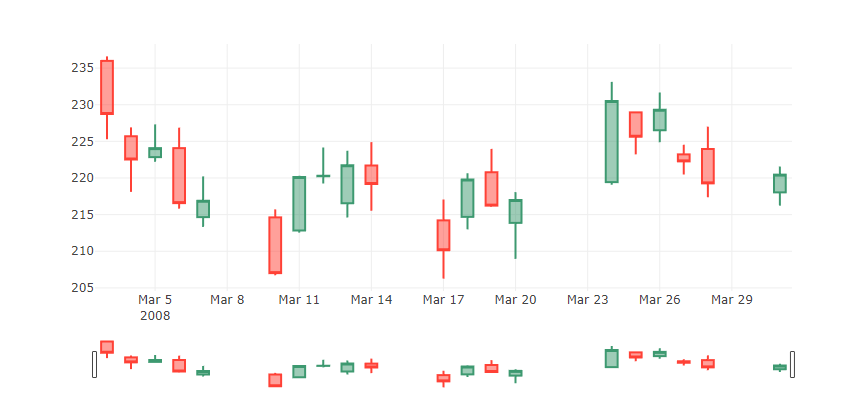

In [ ]:
# Candlestick chart of 2008
trace = go.Candlestick(x=google['2008'].index,
                open=google['2008'].Open,
                high=google['2008'].High,
                low=google['2008'].Low,
                close=google['2008'].Close)
data = [trace]
iplot(data, filename='simple_candlestick')

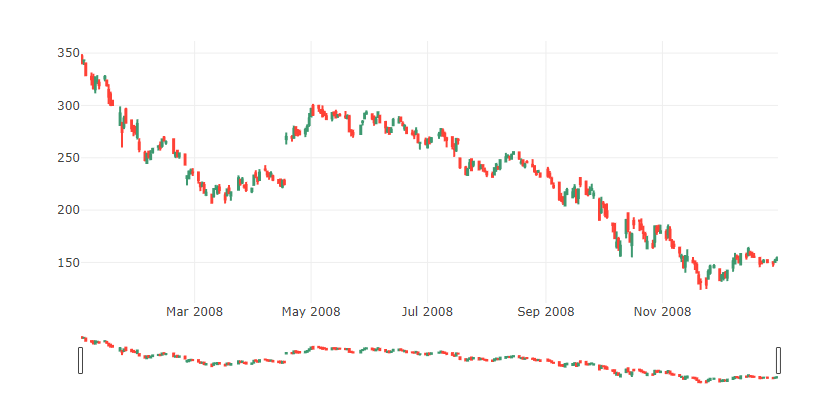

In [ ]:
# Candlestick chart of 2006-2018
trace = go.Candlestick(x=google.index,
                open=google.Open,
                high=google.High,
                low=google.Low,
                close=google.Close)
data = [trace]
iplot(data, filename='simple_candlestick')

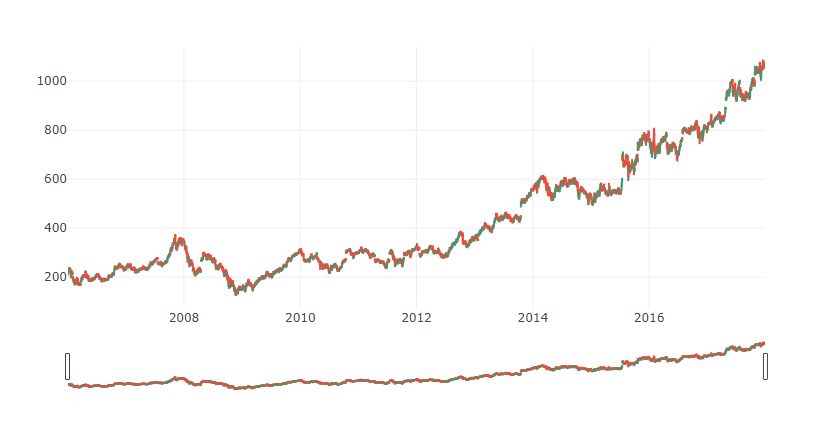

## 2.8 AUTOCRRELACIÓN Y AUTOCORRELACIÓN PARCIAL

- Autocorrelación - La función de autocorrelación (ACF) mide cómo una serie está correlacionada consigo misma en diferentes desplazamientos o "lags".


- La función de autocorrelación parcial se puede interpretar como una regresión de la serie contra sus lags pasados. Los términos se pueden interpretar de la misma manera que en una regresión lineal estándar, es decir, como la contribución de un cambio en ese lag particular mientras se mantienen constantes los demás.

In [ ]:
humidity = pd.read_csv("/content/drive/MyDrive/1. proyectos/PROGRAMACIÓN 2022/proyectos/time series/humidity.csv", index_col='datetime', parse_dates=['datetime'])

In [ ]:
humidity = humidity.iloc[1:]
humidity = humidity.fillna(method='ffill')

sin hacer data cleaning no se obtiene nada

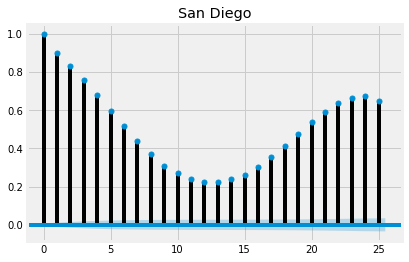

In [ ]:
# Autocorrelation of humidity of San Diego
plot_acf(humidity["San Diego"],lags=25,title="San Diego")
plt.show()

Dado que todos los lags están cerca de 1 o al menos son mayores que el intervalo de confianza, son estadísticamente significativos.

Esta afirmación sugiere que todos los desplazamientos o lags en la función de autocorrelación son altamente correlacionados y que los valores de la serie están influenciados por los valores de sí mismos en períodos de tiempo anteriores. Si todos los lags son estadísticamente significativos, esto puede indicar que hay una fuerte dependencia temporal en la serie y que el modelo subyacente puede requerir términos autorregresivos (AR) para capturar la autocorrelación en los datos. Sin embargo, es importante tener en cuenta que la interpretación de la significancia estadística en el contexto de la autocorrelación depende del contexto específico y puede requerir análisis adicionales.

AUTOCORRELACIÓN PARCIAL

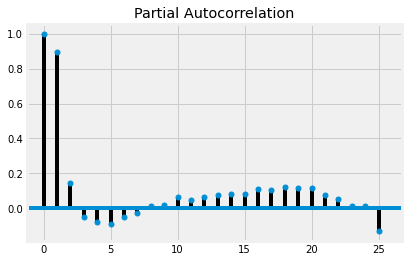

In [ ]:
# Partial Autocorrelation of humidity of San Diego
plot_pacf(humidity["San Diego"],lags=25)
plt.show()

Aunque es estadísticamente significativo, la autocorrelación parcial después de los primeros dos lags es muy baja.

Esta afirmación sugiere que, aunque la serie puede estar autocorrelacionada en los primeros dos lags, no hay una dependencia significativa en los lags posteriores. Esto puede indicar que la serie ha alcanzado una especie de estacionariedad, en la que los valores de la serie están distribuidos de manera relativamente uniforme en el tiempo. En términos de modelado, esto podría significar que un modelo ARMA (autorregresivo de media móvil) podría ser apropiado para la serie, en lugar de un modelo ARIMA (autorregresivo integrado de media móvil) que tiene en cuenta la tendencia y la estacionalidad. Sin embargo, es importante tener en cuenta que la interpretación de la autocorrelación parcial y su relación con la estacionariedad y la selección de modelos depende del contexto específico y puede requerir análisis adicionales.

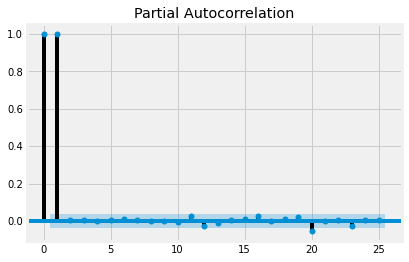

In [ ]:
# Partial Autocorrelation of closing price of microsoft stocks
plot_pacf(microsoft["Close"],lags=25)
plt.show()

Aquí, solo los lags 0, 1 y 20 son estadísticamente significativos.

Esta afirmación sugiere que solo hay tres desplazamientos o lags en la función de autocorrelación que son altamente correlacionados, y que los valores de la serie están influenciados por los valores de sí mismos en esos lags específicos. Los lags 0 y 1 sugieren una posible dependencia temporal a corto plazo en la serie, mientras que el lag 20 sugiere una posible dependencia temporal a largo plazo. En términos de modelado, esto podría significar que un modelo ARIMA (autorregresivo integrado de media móvil) con términos autorregresivos en los lags 0, 1 y 20 podría ser apropiado para capturar la autocorrelación en los datos. Sin embargo, es importante tener en cuenta que la selección de modelos y la interpretación de la significancia estadística en el contexto de la autocorrelación dependen del contexto específico y pueden requerir análisis adicionales.

# 3.0 Descomposición de series temporales y caminatas aleatorias.

##3.1 tendencias, estacionalidad y ruido

Estos son los componentes de una serie temporal:

Tendencia: Es la dirección consistente hacia arriba o hacia abajo de una serie temporal.

Estacionalidad: Se refiere al patrón periódico claro de una serie temporal, como una función senoidal.

Ruido: Son los valores atípicos o faltantes que aparecen en la serie temporal. También se le llama fluctuaciones aleatorias o errores.

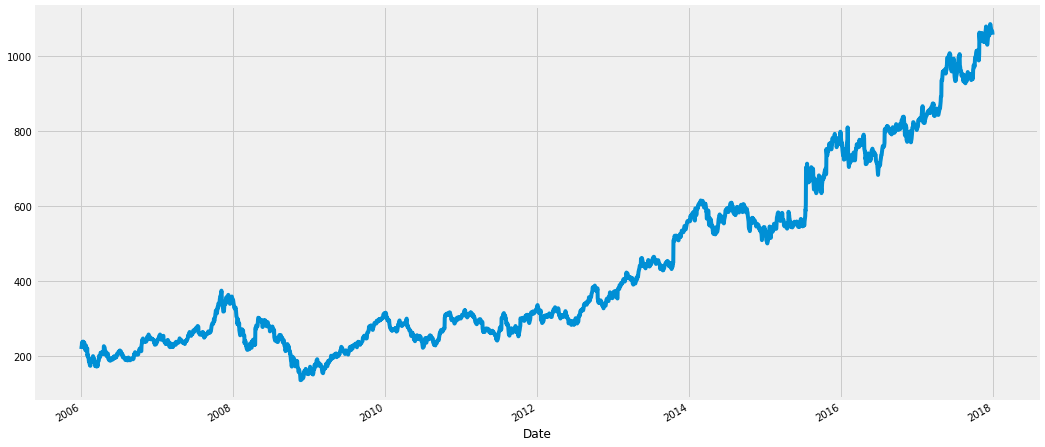

In [ ]:
# Let's take Google stocks High for this
google["High"].plot(figsize=(16,8))

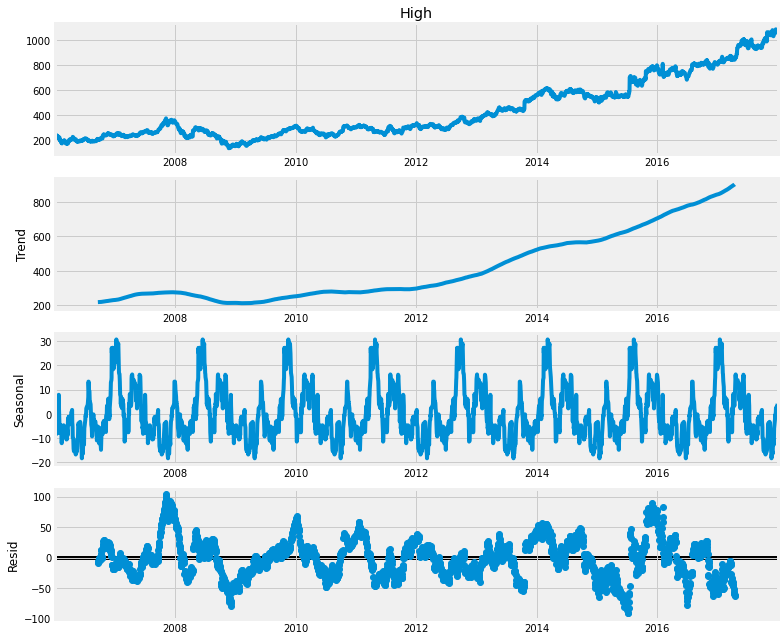

In [ ]:
# Now, for decomposition...
rcParams['figure.figsize'] = 11, 9
decomposed_google_volume = sm.tsa.seasonal_decompose(google["High"],freq=360) # The frequncy is annual
figure = decomposed_google_volume.plot()
plt.show()

- Claramente se observa una tendencia al alza en el gráfico anterior.
- También se puede ver un cambio estacional uniforme.
- El ruido no uniforme representa valores atípicos y valores faltantes.

## 3.2 RUIDO BLANCO

El ruido blanco tiene las siguientes características:

- Media constante: La media de un proceso de ruido blanco es constante y no depende del tiempo.
- Varianza constante: La varianza de un proceso de ruido blanco es constante y no depende del tiempo.
- Auto-correlación cero en todos los retardos: La auto-correlación entre los valores de un proceso de ruido blanco en diferentes puntos en el tiempo es cero. Esto significa que los valores del proceso no están correlacionados entre sí y son completamente aleatorios.

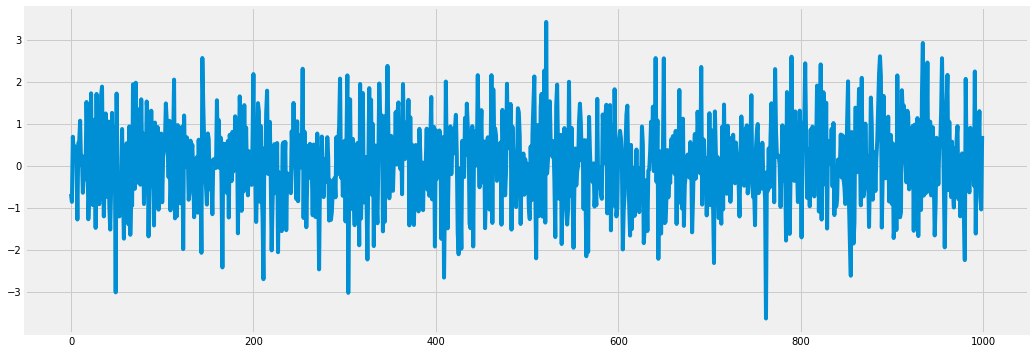

In [ ]:
# Plotting white noise
rcParams['figure.figsize'] = 16, 6
white_noise = np.random.normal(loc=0, scale=1, size=1000)
# loc is mean, scale is variance
plt.plot(white_noise)

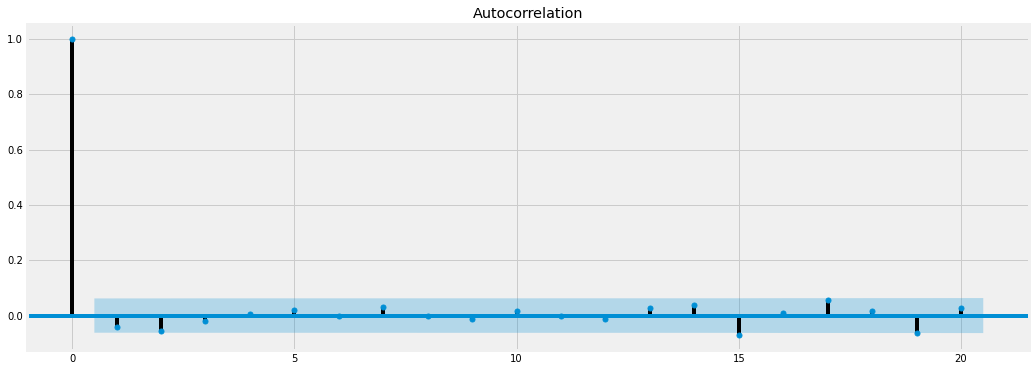

In [ ]:
# Plotting autocorrelation of white noise
plot_acf(white_noise,lags=20)
plt.show()

Se puede observar que todos los retrasos son estadísticamente insignificantes ya que se encuentran dentro del intervalo de confianza (parte sombreada).

## 3.3 PASEO ALEATORIO

Una caminata aleatoria es un objeto matemático, conocido como proceso estocástico o aleatorio, que describe una trayectoria que consiste en una sucesión de pasos aleatorios en algún espacio matemático, como los números enteros.

En general, si hablamos de acciones, el precio de hoy es igual al precio de ayer más un ruido. En términos matemáticos, la ecuación se escribe como: Precio de hoy = Precio de ayer + Ruido.

Pt = Pt-1 + εt

Las caminatas aleatorias no se pueden pronosticar porque, en general, el ruido es aleatorio y difícil de predecir.

Una caminata aleatoria con drift (deriva) (con una deriva μ de media cero) se puede representar mediante la siguiente ecuación:

Pt - Pt-1 = μ + εt

La prueba de regresión para una caminata aleatoria se puede hacer utilizando la siguiente ecuación:

Pt = α + βPt-1 + εt

que es equivalente a:

Pt - Pt-1 = α + βPt-1 + εt

La prueba de Dickey-Fuller se utiliza para comprobar si una serie temporal es una caminata aleatoria. La hipótesis nula es que la serie es una caminata aleatoria, y la hipótesis alternativa es que no lo es.

La prueba ADF (Augmented Dickey-Fuller) es una variante de la prueba Dickey-Fuller que utiliza más cambios rezagados en el lado derecho de la ecuación. Esta prueba se utiliza para determinar si una muestra de series temporales tiene una raíz unitaria. En otras palabras, si una serie temporal tiene una raíz unitaria, es probable que sea una caminata aleatoria.

In [ ]:
# Augmented Dickey-Fuller test on volume of google and microsoft stocks 
adf = adfuller(microsoft["Volume"])
print("p-value of microsoft: {}".format(float(adf[1])))
adf = adfuller(google["Volume"])
print("p-value of google: {}".format(float(adf[1])))

p-value of microsoft: 0.00032015252776520207
p-value of google: 6.510719605768194e-07


Generating a random walk

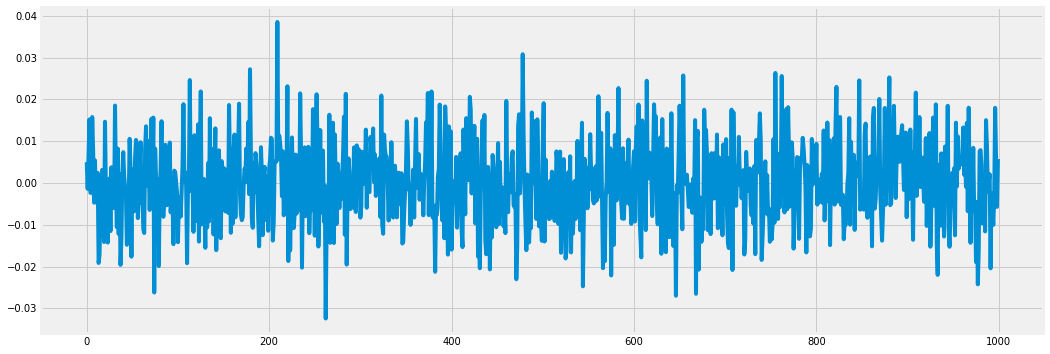

In [ ]:
seed(42)
rcParams['figure.figsize'] = 16, 6
random_walk = normal(loc=0, scale=0.01, size=1000)
plt.plot(random_walk)
plt.show()

In [ ]:
fig = ff.create_distplot([random_walk],['Random Walk'],bin_size=0.001)
iplot(fig, filename='Basic Distplot')

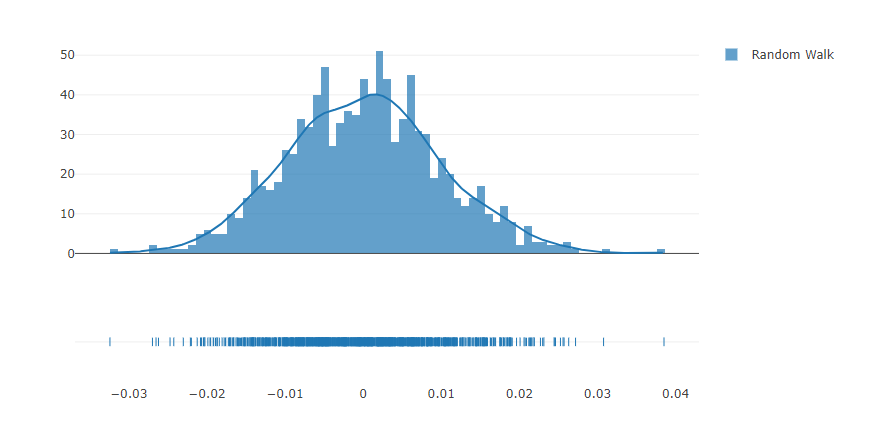

## 3.4 ESTACIONALIDAD

Una serie temporal estacionaria es aquella cuyas propiedades estadísticas, como la media, la varianza, la autocorrelación, etc., son constantes en el tiempo.

La estacionariedad fuerte se refiere a un proceso estocástico cuya distribución conjunta de probabilidad incondicional no cambia cuando se desplaza en el tiempo. En consecuencia, los parámetros como la media y la varianza también no cambian con el tiempo.

La estacionariedad débil se refiere a un proceso en el que la media, la varianza y la autocorrelación son constantes a lo largo del tiempo.

La estacionariedad es importante porque las series no estacionarias que dependen del tiempo tienen demasiados parámetros para tener en cuenta al modelar la serie temporal. El método diff() se puede utilizar para convertir fácilmente una serie no estacionaria en una serie estacionaria.

Ahora intentaremos descomponer el componente estacional de la serie temporal descompuesta anteriormente.

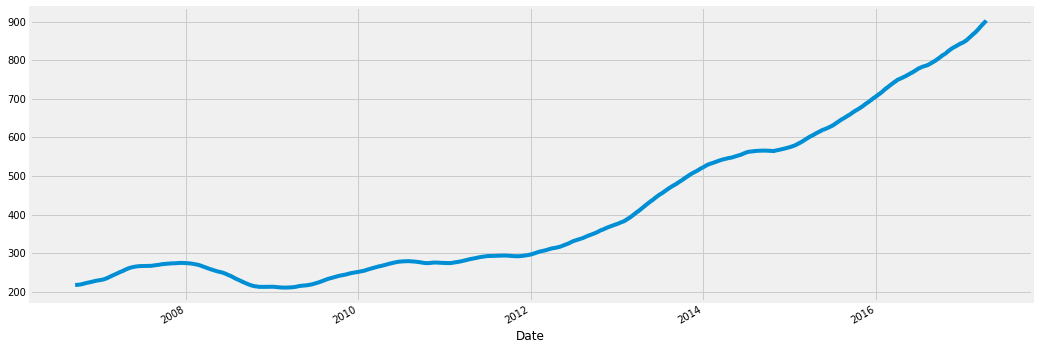

In [ ]:
# The original non-stationary plot
decomposed_google_volume.trend.plot()

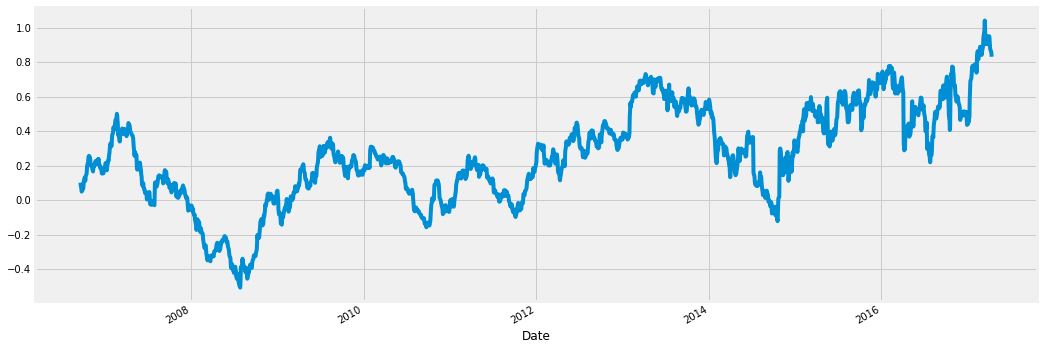

In [ ]:
# The new stationary plot
decomposed_google_volume.trend.diff().plot()

#4.0 MODELOS Y USO DE HERRAMIENTAS ESTADÍSTICAS

## 4.1 MODELOS AR

Tanto la estacionariedad fuerte como la estacionariedad débil tienen la propiedad de que la media y la varianza son constantes a lo largo del tiempo.

- La estacionariedad fuerte implica que la distribución conjunta de probabilidad del proceso estocástico no cambia con el tiempo, lo que significa que la media y la varianza no cambian con el tiempo.

- La estacionariedad débil implica que la media y la varianza del proceso son constantes a lo largo del tiempo, incluso si la distribución de probabilidad de cada punto en el tiempo no es la misma. La autocorrelación también es constante a lo largo del tiempo en un proceso estacionario débil.

En ambos casos, la constancia de la media y la varianza es una propiedad clave de la estacionariedad, lo que permite que las propiedades estadísticas de la serie temporal sean modeladas y pronosticadas de manera más efectiva.

Un modelo AR(1) es un modelo autorregresivo de orden 1, que se puede escribir como:

Rt = μ + ϕRt-1 + εt

Donde Rt-1 es el valor de la serie temporal en el momento anterior, μ es la media de la serie, ϕ es el coeficiente de autorregresión, εt es el ruido (también conocido como error).

Si ϕ = 1, entonces el modelo se reduce a una caminata aleatoria. Si ϕ = 0, entonces el modelo es un ruido blanco. Si -1 < ϕ < 1, entonces el modelo es estacionario. Si ϕ es negativo, hay una tendencia a la reversión a la media. Si ϕ es positivo, hay una tendencia de momentum.

Un modelo AR(2) tiene dos términos de retraso, y se puede escribir como:

Rt = μ + ϕ1Rt-1 + ϕ2Rt-2 + εt

Un modelo AR(3) tiene tres términos de retraso, y se puede escribir como:

Rt = μ + ϕ1Rt-1 + ϕ2Rt-2 + ϕ3Rt-3 + εt

En general, un modelo AR(p) tiene p términos de retraso. Los modelos AR se utilizan a menudo en el análisis de series temporales para modelar las correlaciones de orden superior en la serie temporal y para predecir valores futuros de la serie.

SIMULACIÓN MODELO  AR(1) 

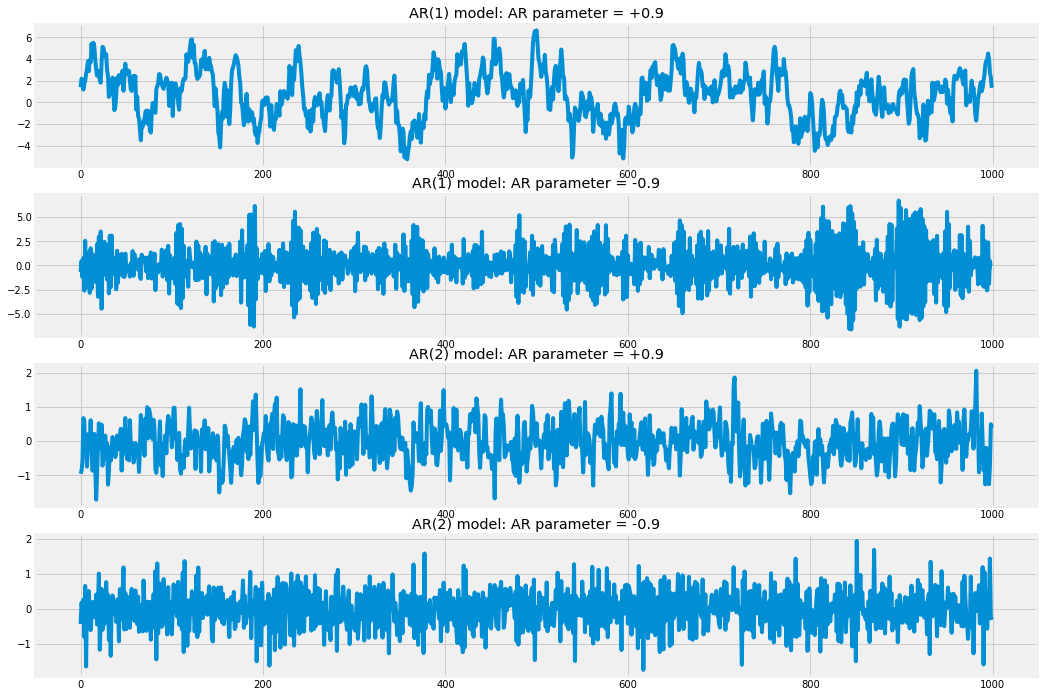

In [ ]:
# AR(1) MA(1) model:AR parameter = +0.9
rcParams['figure.figsize'] = 16, 12
plt.subplot(4,1,1)
ar1 = np.array([1, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma1 = np.array([1])
AR1 = ArmaProcess(ar1, ma1)
sim1 = AR1.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = +0.9')
plt.plot(sim1)
# We will take care of MA model later
# AR(1) MA(1) AR parameter = -0.9
plt.subplot(4,1,2)
ar2 = np.array([1, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma2 = np.array([1])
AR2 = ArmaProcess(ar2, ma2)
sim2 = AR2.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = -0.9')
plt.plot(sim2)
# AR(2) MA(1) AR parameter = 0.9
plt.subplot(4,1,3)
ar3 = np.array([2, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma3 = np.array([1])
AR3 = ArmaProcess(ar3, ma3)
sim3 = AR3.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = +0.9')
plt.plot(sim3)
# AR(2) MA(1) AR parameter = -0.9
plt.subplot(4,1,4)
ar4 = np.array([2, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma4 = np.array([1])
AR4 = ArmaProcess(ar4, ma4)
sim4 = AR4.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = -0.9')
plt.plot(sim4)
plt.show()


PREDICIONES Y MODELOS SIMULADOS

In [ ]:
model = ARMA(sim1, order=(1,0))
result = model.fit()
print(result.summary())
print("μ={} ,ϕ={}".format(result.params[0],result.params[1]))

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1415.701
Method:                       css-mle   S.D. of innovations              0.996
Date:                Thu, 16 Feb 2023   AIC                           2837.403
Time:                        17:46:04   BIC                           2852.126
Sample:                             0   HQIC                          2842.998
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7072      0.288      2.454      0.014       0.142       1.272
ar.L1.y        0.8916      0.014     62.742      0.000       0.864       0.919
                                    Roots           

"ϕ está alrededor de 0.9, lo cual es lo que elegimos como parámetro AR en nuestro primer modelo simulado".

predicción del modelo

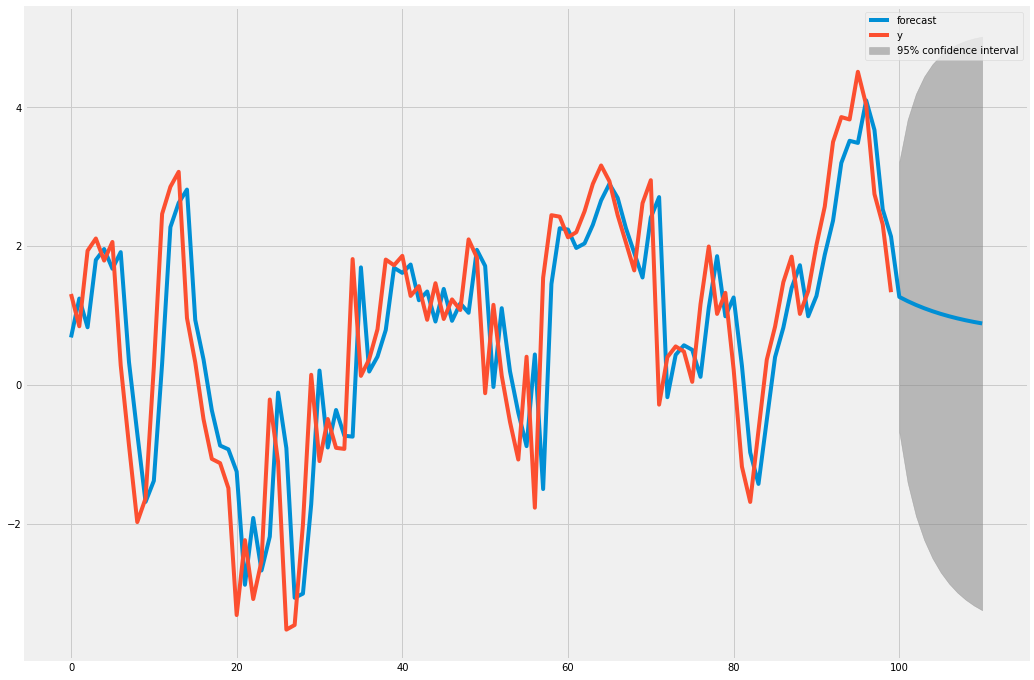

In [ ]:
# Predicting simulated AR(1) model 
result.plot_predict(start=900, end=1010)
plt.show()

In [ ]:
rmse = math.sqrt(mean_squared_error(sim1[900:1011], result.predict(start=900,end=999)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 1.0408054536745255.


"La gráfica y es una predicción. ¡Muy cercana!"

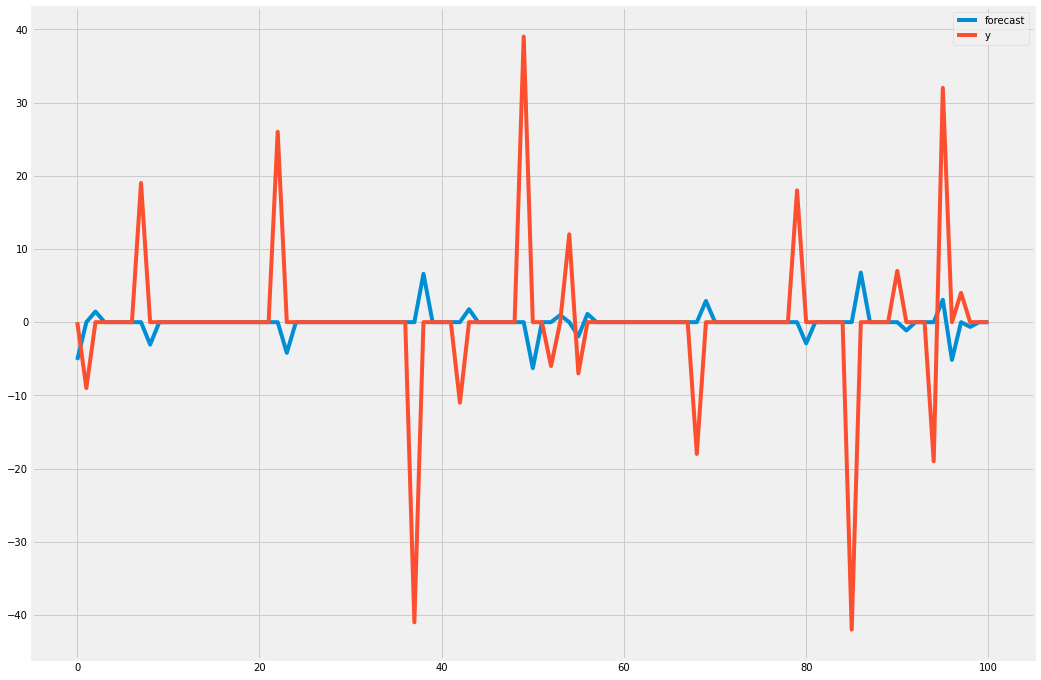

In [ ]:
# Predicting humidity level of Montreal
humid = ARMA(humidity["Montreal"].diff().iloc[1:].values, order=(1,0))
res = humid.fit()
res.plot_predict(start=1000, end=1100)
plt.show()

In [ ]:
rmse = math.sqrt(mean_squared_error(humidity["Montreal"].diff().iloc[900:1000].values, result.predict(start=900,end=999)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 7.2183885666016.


"No es muy impresionante. Pero intentemos con las acciones de Google".

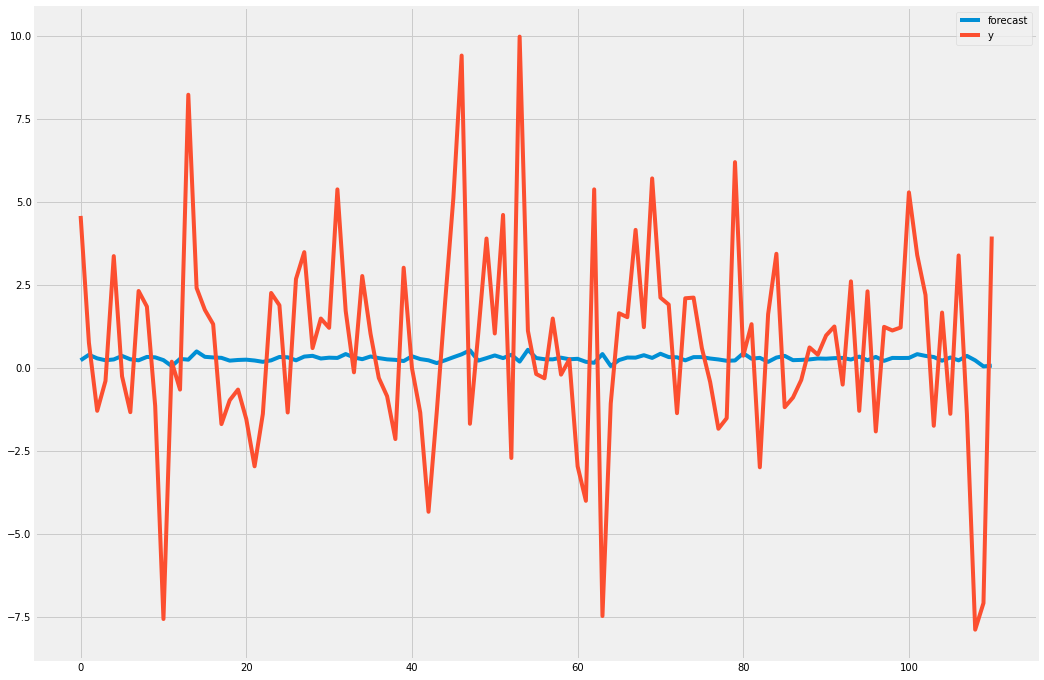

In [ ]:
# Predicting closing prices of google
humid = ARMA(google["Close"].diff().iloc[1:].values, order=(1,0))
res = humid.fit()
res.plot_predict(start=900, end=1010)
plt.show()

Existen mejores métodos

## 4.2 MA MODELS

El modelo de media móvil (MA) es un enfoque común para modelar series de tiempo univariadas. El modelo de media móvil especifica que la variable de salida depende linealmente de los valores actuales y varios valores pasados de un término estocástico (imperfectamente predecible).

El modelo MA(1) se escribe como:

Rt = μ + ϵt1 + θϵt-1

Lo cual se traduce en "El retorno de hoy es igual a la media más el ruido de hoy más el ruido de ayer". En este modelo, ϵt es el ruido en el tiempo t, θ es el coeficiente que describe la relación entre el ruido en el tiempo t-1 y el ruido en el tiempo t, y μ es la media de la serie temporal.

En general, el modelo de media móvil se utiliza para capturar las correlaciones a corto plazo en una serie temporal. Al incluir los errores de predicción pasados en el modelo, el modelo de media móvil puede ayudar a predecir mejor los valores futuros de la serie.

SIMULACIÓN DEL MODELO MA(1) 

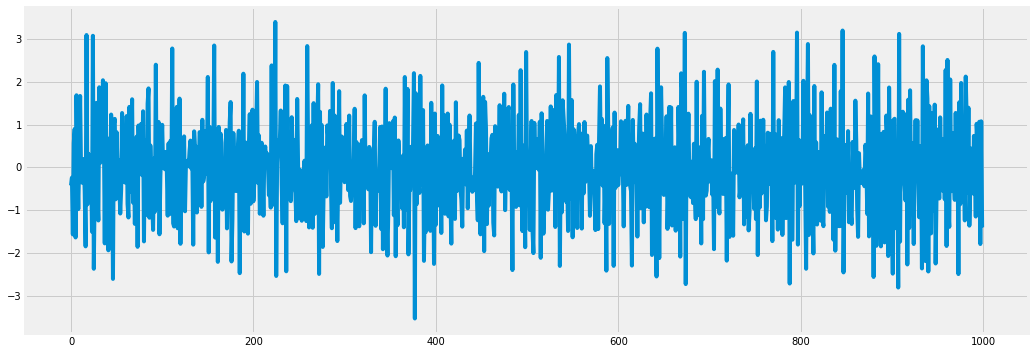

In [ ]:
rcParams['figure.figsize'] = 16, 6
ar1 = np.array([1])
ma1 = np.array([1, -0.5])
MA1 = ArmaProcess(ar1, ma1)
sim1 = MA1.generate_sample(nsample=1000)
plt.plot(sim1)

PREDICCIONES DEL MODELO SIMULADO MA

In [ ]:
model = ARMA(sim1, order=(0,1))
result = model.fit()
print(result.summary())
print("μ={} ,θ={}".format(result.params[0],result.params[1]))

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1423.276
Method:                       css-mle   S.D. of innovations              1.004
Date:                Thu, 16 Feb 2023   AIC                           2852.553
Time:                        17:56:12   BIC                           2867.276
Sample:                             0   HQIC                          2858.148
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0228      0.014     -1.652      0.099      -0.050       0.004
ma.L1.y       -0.5650      0.027    -20.797      0.000      -0.618      -0.512
                                    Roots           

PREDICCIONES USANDO MODELOS MA

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                45251
Model:                     ARMA(0, 3)   Log Likelihood             -153516.982
Method:                       css-mle   S.D. of innovations              7.197
Date:                Thu, 16 Feb 2023   AIC                         307043.965
Time:                        17:58:32   BIC                         307087.564
Sample:                             0   HQIC                        307057.686
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0008      0.031     -0.025      0.980      -0.061       0.060
ma.L1.y       -0.1621      0.005    -34.507      0.000      -0.171      -0.153
ma.L2.y        0.0386      0.005      8.316      0.0

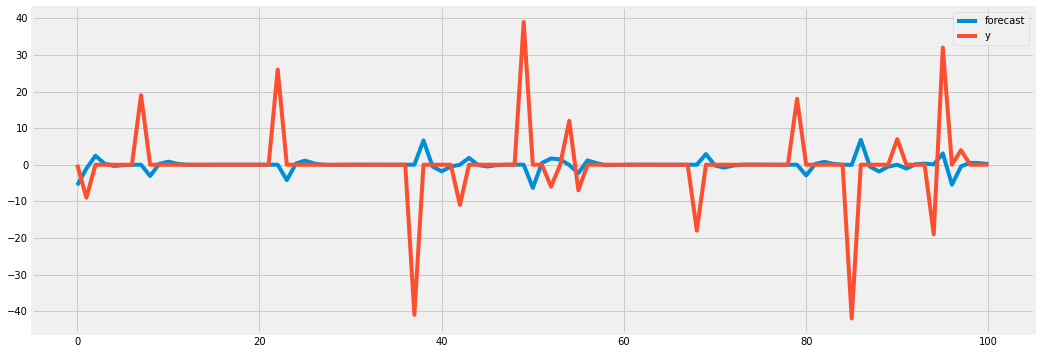

In [ ]:
# Forecasting and predicting montreal humidity
model = ARMA(humidity["Montreal"].diff().iloc[1:].values, order=(0,3))
result = model.fit()
print(result.summary())
print("μ={} ,θ={}".format(result.params[0],result.params[1]))
result.plot_predict(start=1000, end=1100)
plt.show()

In [ ]:
rmse = math.sqrt(mean_squared_error(humidity["Montreal"].diff().iloc[1000:1101].values, result.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 11.345129512388803.


## 4.3 MODELOS ARMA

Los modelos autoregresivos de media móvil (ARMA) proporcionan una descripción parsimoniosa de un proceso estocástico (débilmente) estacionario en términos de dos polinomios, uno para la autorregresión y el segundo para el promedio móvil. Es la fusión de los modelos AR y MA.

El modelo ARMA(1,1) se escribe como:

Rt = μ + ϕRt-1 + ϵt + θϵt-1

Básicamente, "El retorno de hoy es igual a la media más el retorno de ayer más el ruido de hoy más el ruido de ayer". En este modelo, ϕ y θ son los coeficientes de autoregresión y media móvil, respectivamente, ϵt es el ruido en el tiempo t y μ es la media de la serie temporal.

El uso de los modelos ARMA permite describir y predecir la evolución de series temporales estacionarias. Al fusionar los modelos AR y MA, los modelos ARMA pueden capturar tanto las correlaciones a corto plazo como las correlaciones a largo plazo en una serie temporal. Para hacer predicciones con modelos ARMA, se utilizan técnicas de estimación de parámetros para ajustar el modelo a los datos históricos y luego se realizan pronósticos basados en el modelo ajustado.

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 3018
Model:                     ARMA(3, 3)   Log Likelihood              -55408.974
Method:                       css-mle   S.D. of innovations       22751607.102
Date:                Thu, 16 Feb 2023   AIC                         110833.948
Time:                        18:06:13   BIC                         110882.047
Sample:                             0   HQIC                        110851.244
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.03e+04   9913.393     -2.047      0.041   -3.97e+04    -867.326
ar.L1.y        0.2053      0.160      1.287      0.198      -0.107       0.518
ar.L2.y        0.7297      0.179      4.080      0.0

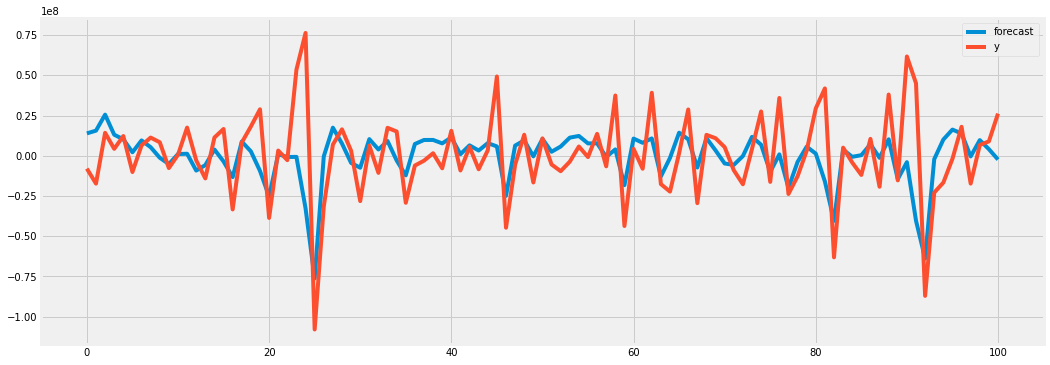

In [ ]:
# Forecasting and predicting microsoft stocks volume
model = ARMA(microsoft["Volume"].diff().iloc[1:].values, order=(3,3))
result = model.fit()
print(result.summary())
print("μ={}, ϕ={}, θ={}".format(result.params[0],result.params[1],result.params[2]))
result.plot_predict(start=1000, end=1100)
plt.show()

In [ ]:
rmse = math.sqrt(mean_squared_error(microsoft["Volume"].diff().iloc[1000:1101].values, result.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 38038416.83660263.


## 4.4 MODELO ARIMA

Un modelo autoregresivo integrado de media móvil (ARIMA) es una generalización del modelo autoregresivo de media móvil (ARMA). Ambos modelos se ajustan a datos de series de tiempo, ya sea para comprender mejor los datos o para predecir puntos futuros en la serie (pronóstico). Los modelos ARIMA se aplican en algunos casos donde los datos muestran evidencia de no estacionariedad, donde se puede aplicar un paso de diferenciación inicial (correspondiente a la parte "integrada" del modelo) una o más veces para eliminar la no estacionariedad. El modelo ARIMA tiene la forma: ARIMA(p,d,q): p es el parámetro AR, d es el parámetro de diferenciación y q es el parámetro MA.

Algunos ejemplos de modelos ARIMA son los siguientes:

ARIMA(1,0,0): yt = a1yt-1 + ϵt
ARIMA(1,0,1): yt = a1yt-1 + ϵt + b1ϵt-1
ARIMA(1,1,1): Δyt = a1Δyt-1 + ϵt + b1ϵt-1, donde Δyt = yt - yt-1.
En estos modelos, ϵt es el ruido en el tiempo t, a1 y b1 son los coeficientes de autoregresión y media móvil, respectivamente, yt es la serie temporal y Δyt es la serie temporal diferenciada. Los modelos ARIMA permiten describir y predecir la evolución de series temporales no estacionarias al incorporar tanto la dependencia de los valores pasados (a través de la autorregresión y el promedio móvil) como la tendencia de la serie temporal (a través de la diferenciación).

PREDICCIONES USANDO ARIMA MODEL

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 3017
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -56385.467
Method:                       css-mle   S.D. of innovations       31647215.002
Date:                Thu, 16 Feb 2023   AIC                         112778.933
Time:                        18:20:59   BIC                         112802.981
Sample:                             1   HQIC                        112787.581
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9984.0302   2.48e+05      0.040      0.968   -4.75e+05    4.95e+05
ar.L1.D.y     -0.8716      0.016    -53.758      0.000      -0.903      -0.840
ar.L2.D.y     -0.4551      0.016    -28.071      0.0

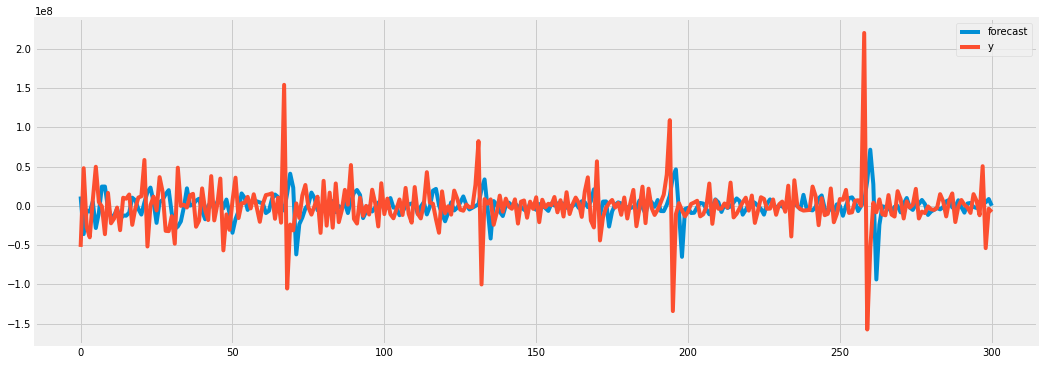

In [ ]:
# Predicting the microsoft stocks volume
rcParams['figure.figsize'] = 16, 6
model = ARIMA(microsoft["Volume"].diff().iloc[1:].values, order=(2,1,0))
result = model.fit()
print(result.summary())
result.plot_predict(start=700, end=1000)
plt.show()

In [ ]:
rmse = math.sqrt(mean_squared_error(microsoft["Volume"].diff().iloc[700:1001].values, result.predict(start=700,end=1000)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 61937625.34711408.


Si se tiene en cuenta el ligero retraso en la predicción, este es un modelo adecuado. Al evaluar la precisión de un modelo de pronóstico, es importante tener en cuenta que la predicción puede tener un cierto grado de retraso en relación con el valor real de la serie temporal.

En algunos casos, este retraso puede ser aceptable y no afectar significativamente la utilidad del modelo de pronóstico. En otros casos, el retraso puede ser más problemático y requerir ajustes en el modelo o en la forma en que se utilizan las predicciones.

En cualquier caso, es importante evaluar cuidadosamente la precisión y la utilidad de un modelo de pronóstico en relación con los objetivos específicos de análisis de la serie temporal, y ajustar y refinar el modelo según sea necesario para mejorar su rendimiento.

Teniendo en cuenta el pequeño retraso en la predicción, este es un buen modelo

##4.5 MODELOS VAR

La regresión vectorial autorregresiva (VAR, por sus siglas en inglés) es un modelo de proceso estocástico utilizado para capturar las interdependencias lineales entre múltiples series de tiempo. Los modelos VAR generalizan el modelo autorregresivo univariante (AR) al permitir más de una variable en evolución. Todas las variables en un modelo VAR ingresan al modelo de la misma manera: cada variable tiene una ecuación que explica su evolución en función de sus propios valores rezagados, los valores rezagados de las otras variables del modelo y un término de error. La modelización VAR no requiere tanto conocimiento sobre las fuerzas que influyen en una variable como los modelos estructurales con ecuaciones simultáneas: el único conocimiento previo requerido es una lista de variables que se pueden hipotetizar que afectan mutuamente intertemporalmente.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning:

Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                           Statespace Model Results                           
Dep. Variable:     ['Close', 'Close']   No. Observations:                 3018
Model:                     VARMA(2,1)   Log Likelihood              -12185.170
                          + intercept   AIC                          24404.341
Date:                Thu, 16 Feb 2023   BIC                          24506.551
Time:                        18:28:09   HQIC                         24441.094
Sample:                             0                                         
                               - 3018                                         
Covariance Type:                  opg                                         
Ljung-Box (L1) (Q):             0.00, 0.00   Jarque-Bera (JB):   48239.99, 14923.49
Prob(Q):                        0.99, 1.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         3.32, 1.62   Skew:                      1.15, -0.03
Prob(H) (two-sided):            0.00,

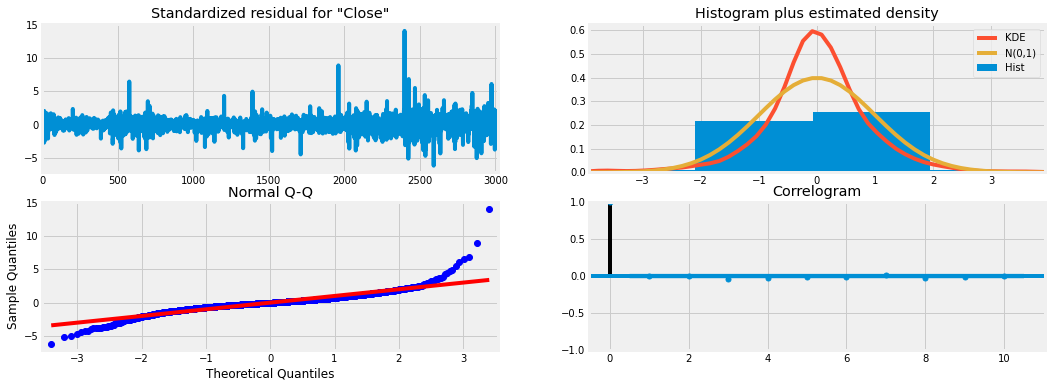

In [ ]:
# Predicting closing price of Google and microsoft
train_sample = pd.concat([google["Close"].diff().iloc[1:],microsoft["Close"].diff().iloc[1:]],axis=1)
model = sm.tsa.VARMAX(train_sample,order=(2,1),trend='c')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=1000)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample.iloc[1:1002].values, predicted_result.values))
print("The root mean squared error is {}.".format(rmse))

## 4.6 modelo general de espacio de estados

Un modelo general de espacio de estados tiene la forma:

yt = Ztαt + dt + εt

αt = Ttαt-1 + ct + Rtηt

donde yt se refiere al vector de observación en el tiempo t, αt se refiere al vector de estado (no observado) en el tiempo t, y donde los componentes irregulares se definen como:

εt ~ N(0, Ht)

ηt ~ N(0, Qt)

Las variables restantes (Zt, dt, Ht, Tt, ct, Rt, Qt) en las ecuaciones son matrices que describen el proceso. Sus nombres de variables y dimensiones son los siguientes:

Z: diseño (k_endog × k_states × nobs)
d: intercepción_obs (k_endog × nobs)
H: cov_obs (k_endog × k_endog × nobs)
T: transición (k_states × k_states × nobs)
c: intercepción_estado (k_states × nobs)
R: selección (k_states × k_posdef × nobs)
Q: cov_estado (k_posdef × k_posdef × nobs)

En el caso de que una de las matrices sea invariante en el tiempo (por lo que, por ejemplo, Zt = Zt + 1 ∀ t), su última dimensión puede tener un tamaño de 1 en lugar de un tamaño nobs.

Esta forma genérica encapsula muchos de los modelos lineales de series de tiempo más populares (ver más abajo) y es muy flexible, permitiendo la estimación con observaciones faltantes, la predicción, las funciones de respuesta al impulso y mucho más.

## 4.6.1 SARIMA MODELS

Los modelos SARIMA son útiles para modelar series de tiempo estacionales, en las que la media y otras estadísticas para una determinada temporada no son estacionarias a través de los años. El modelo SARIMA definido constituye una extensión directa de los modelos no estacionales de autorregresión media móvil (ARMA) y autorregresión media móvil integrada (ARIMA) presentados.


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3018
Model:               SARIMAX(4, 0, 4)   Log Likelihood              -10099.014
Date:                Thu, 16 Feb 2023   AIC                          20218.029
Time:                        18:46:30   BIC                          20278.152
Sample:                             0   HQIC                         20239.648
                               - 3018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1083      0.047      2.280      0.023       0.015       0.201
ar.L1          0.2292      0.006     37.195      0.000       0.217       0.241
ar.L2          1.1241      0.005    216.665      0.0

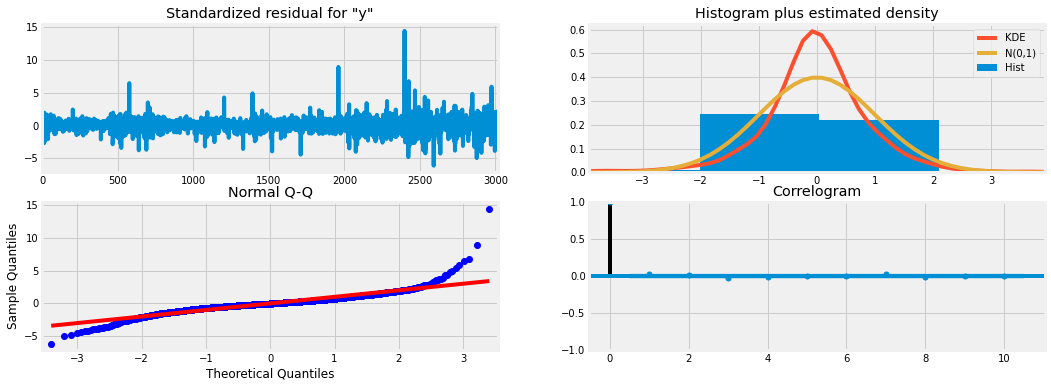

In [ ]:
# Predicting closing price of Google'
train_sample = google["Close"].diff().iloc[1:].values
model = sm.tsa.SARIMAX(train_sample,order=(4,0,4),trend='c')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=500)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample[1:502], predicted_result))
print("The root mean squared error is {}.".format(rmse))

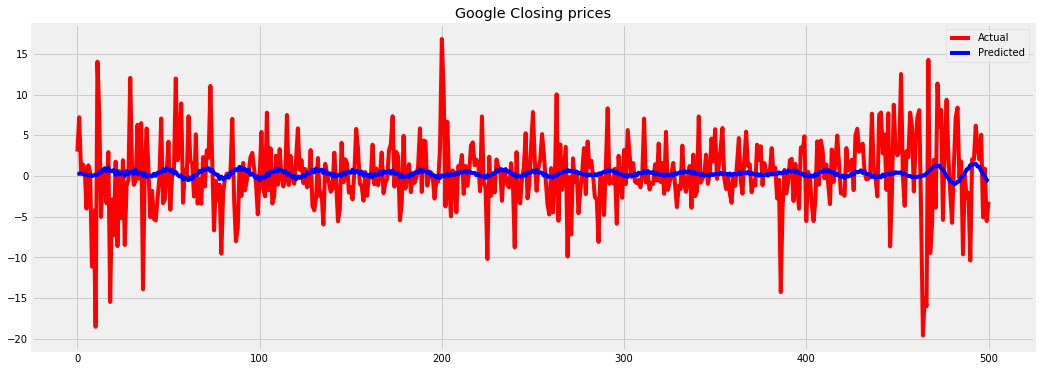

In [ ]:
plt.plot(train_sample[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('Google Closing prices')
plt.show()

## 4.6.2 COMPONENTES INOBSERVADOS 

Un modelo UCM descompone la serie de respuesta en componentes como la tendencia, las estaciones, los ciclos y los efectos de regresión debido a las series predictoras. El siguiente modelo muestra un escenario posible:

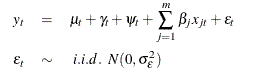

                        Unobserved Components Results                         
Dep. Variable:                      y   No. Observations:                 3018
Model:                    local level   Log Likelihood              -10116.511
Date:                Thu, 16 Feb 2023   AIC                          20237.023
Time:                        18:48:51   BIC                          20249.047
Sample:                             0   HQIC                         20241.346
                               - 3018                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular    47.7219      0.384    124.248      0.000      46.969      48.475
sigma2.level      5.033e-05      0.000      0.458      0.647      -0.000       0.000
Ljung-Box (L1) (Q):         

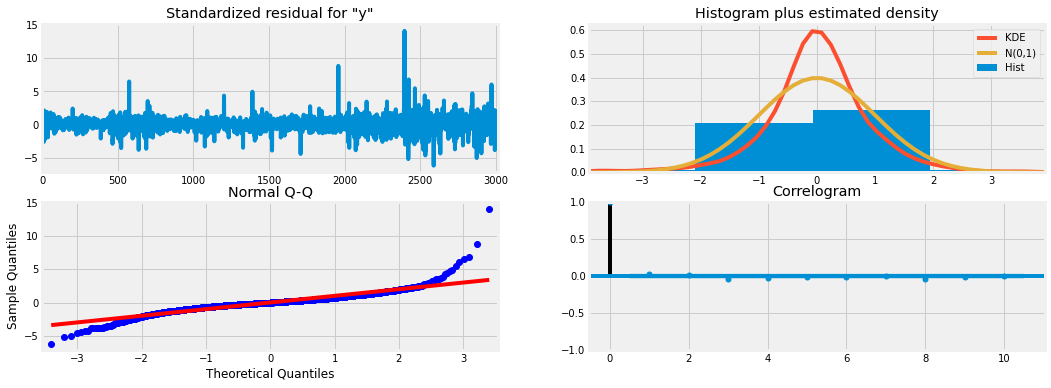

In [ ]:
# Predicting closing price of Google'
train_sample = google["Close"].diff().iloc[1:].values
model = sm.tsa.UnobservedComponents(train_sample,'local level')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=500)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample[1:502], predicted_result))
print("The root mean squared error is {}.".format(rmse))

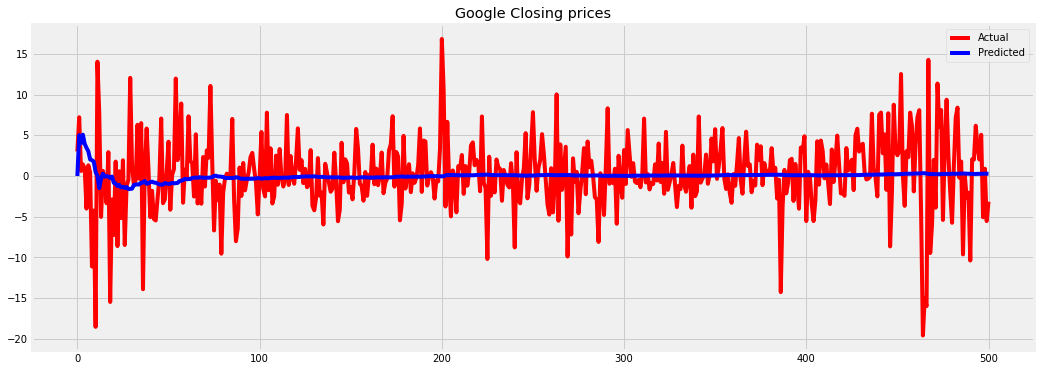

In [ ]:
plt.plot(train_sample[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('Google Closing prices')
plt.show()

## 4.6.3 MODELOS DINAMICOS DE FACTORES

Los modelos dinámicos de factores son modelos flexibles para series de tiempo multivariadas en los que las variables endógenas observadas son funciones lineales de covariables exógenas y factores no observados, los cuales tienen una estructura de autorregresión vectorial. Los factores no observados también pueden ser una función de las covariables exógenas. Las perturbaciones en las ecuaciones para las variables dependientes pueden estar autocorrelacionadas.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                                   Statespace Model Results                                  
Dep. Variable:                    ['Close', 'Close']   No. Observations:                 3018
Model:             DynamicFactor(factors=1, order=2)   Log Likelihood              -12197.974
Date:                               Thu, 16 Feb 2023   AIC                          24407.948
Time:                                       18:51:52   BIC                          24444.022
Sample:                                            0   HQIC                         24420.919
                                              - 3018                                         
Covariance Type:                                 opg                                         
Ljung-Box (L1) (Q):             4.01, 0.57   Jarque-Bera (JB):   49450.70, 15108.52
Prob(Q):                        0.05, 0.45   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         3.38, 1.63   Skew:                      1.14, -0

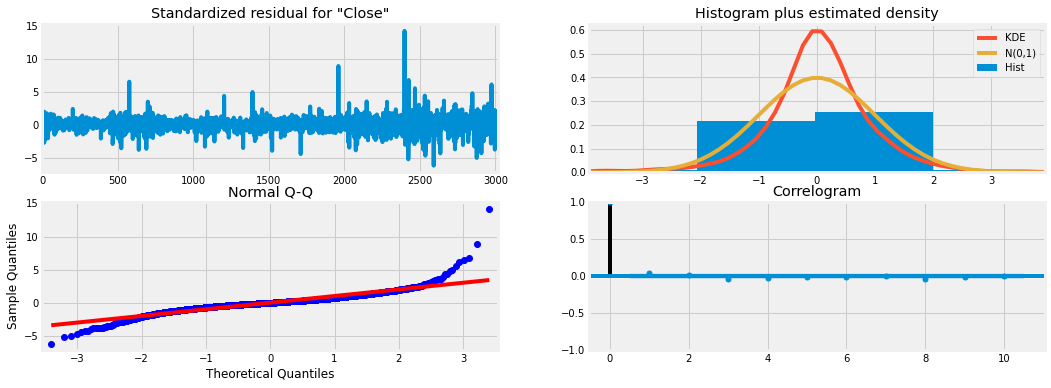

In [ ]:
# Predicting closing price of Google and microsoft
train_sample = pd.concat([google["Close"].diff().iloc[1:],microsoft["Close"].diff().iloc[1:]],axis=1)
model = sm.tsa.DynamicFactor(train_sample, k_factors=1, factor_order=2)
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=1000)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample.iloc[1:1002].values, predicted_result.values))
print("The root mean squared error is {}.".format(rmse))